# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [523]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [524]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [525]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [526]:
#觀察組數
print(app_train.shape)

(307511, 122)


In [527]:
#檢視資料看有無有興趣的資料
print(app_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [528]:
#檢視資料看有無有興趣的資料
print(app_train.tail())

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0            

In [529]:
#檢視資料型態
print(app_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [530]:
print(app_train['AMT_INCOME_TOTAL'].describe()) # 3/4位數 跟 MAX 數字差非常多 預測有偏鋒態或離群值

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [531]:
print(app_train['AMT_INCOME_TOTAL'].mean() > app_train['AMT_INCOME_TOTAL'].median()) #檢查是否有偏峰態 平均數>中位數 峰態偏右

True


In [532]:
#計算偏峰係數
print(app_train['AMT_INCOME_TOTAL'].skew()) # skew > 0 右偏

391.5596541041876


In [533]:
#計算峰度
print(app_train['AMT_INCOME_TOTAL'].kurt()) # kurtosis > 3 有離群值

191786.55438080415


AxesSubplot(0.125,0.125;0.775x0.755)


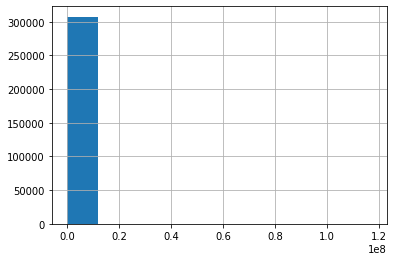

In [534]:
print(app_train['AMT_INCOME_TOTAL'].hist()) #離群值造成資料不準確

Text(0.5, 0, 'AMT_INCOME_TOTAL')

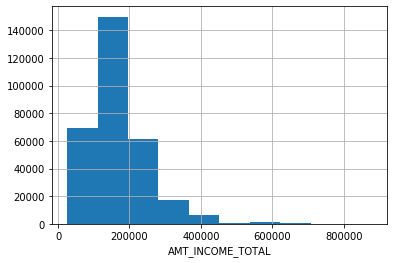

In [535]:
#用Z-score法去除離群值
mean = app_train['AMT_INCOME_TOTAL'].mean()
std = app_train['AMT_INCOME_TOTAL'].std()
app_train['AMT_INCOME_TOTAL'][np.abs(app_train['AMT_INCOME_TOTAL']-mean)<=3*std].hist()
plt.xlabel('AMT_INCOME_TOTAL')

135000.0
-22500.0
337500.0


Text(0.5, 0, 'AMT_INCOME_TOTAL')

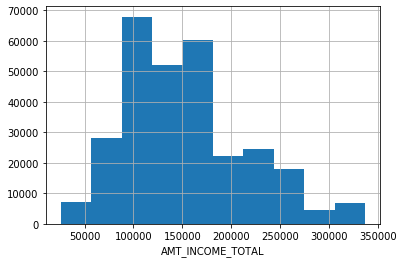

In [536]:
#用IQR來去除離群值
IQR = app_train['AMT_INCOME_TOTAL'].quantile(0.75) - app_train['AMT_INCOME_TOTAL'].quantile(0.25)
print(1.5*IQR)
firstIQR = app_train['AMT_INCOME_TOTAL'].quantile(0.25) - 1.5*IQR
lastIQR = app_train['AMT_INCOME_TOTAL'].quantile(0.75) + 1.5*IQR
print(firstIQR)
print(lastIQR)
app_train.loc[(app_train['AMT_INCOME_TOTAL'] > firstIQR) & (app_train['AMT_INCOME_TOTAL'] < lastIQR)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

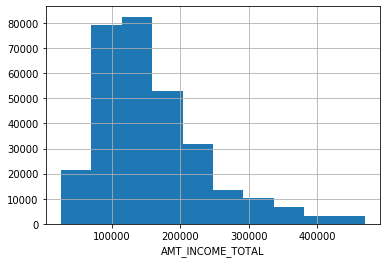

In [537]:
#解答建議的做法
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')